# Power-law distributions

Power-laws appear in many natural systems but detecting them is a non-trivial task. Here, we briefly introduce a maximum likelihood (ML) method suggested by Clauset et al. (2009).

### Continuous power-law distribution

A continuous power-law distribution with lower bound $x_{\text{min}} > 0$ and scaling parameter $\alpha > 1$ is defined as $$p(x) = \frac{\alpha-1}{x_{\text{min}}} \Big(\frac{x}{x_{\text{min}}}\Big)^{-\alpha}. \tag{1}$$ Note that taking logs on both sides $$ \log p(x) = \log \frac{\alpha-1}{x_{\text{min}}} \Big(\frac{x}{x_{\text{min}}}\Big)^{-\alpha} = -\alpha\log x + \underbrace{\log \frac{\alpha-1}{x_{\text{min}}} +\alpha\log x_{\text{min}}}_{\text{constant}}\tag{2}$$ gives a straight line on doubly logarithmic axes.

### Power-law distributed random numbers

Power-law distributed random numbers are readily obtained using the inverse random sampling method. Let $r$ be a uniformly distributed random variable on the half-open interval $[0, 1)$. The transformed random variable $$x = x_{\text{min}}(1-r)^{\normalsize -1/(\alpha-1)}$$ then has a power-law distribution with parameters $x_{\text{min}}$ and $\alpha$.

Stored 'rvs' (ndarray)


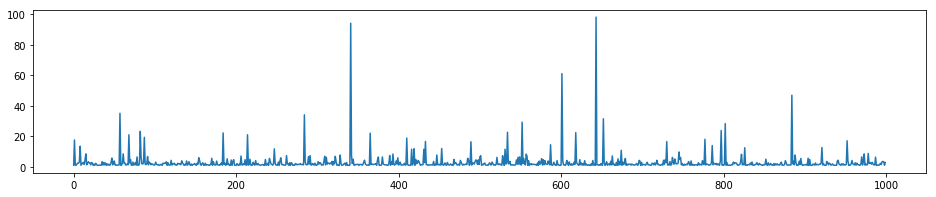

In [239]:
from powerlaw import random
rvs = random(size=1000, xmin=1, alpha=2.5)
%store rvs

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3)); plt.plot(rvs); plt.show()


### ML estimator for the scaling parameter

Assuming that $x_{\text{min}}$ is known, the ML estimator for the scaling parameter $\alpha$ is $$ \hat{\alpha} = 1 + n\Bigg[\sum_{i=1}^{n} \ln\frac{x_{i}}{x_{\text{min}}}\Bigg]^{-1} $$ where $x_{i}$ are the observed data with $x_{i} \geq x_{\text{min}}$.

In [240]:
%store -r rvs
from powerlaw import mle_alpha

print 'The scaling parameter is %1.4f\n' % mle_alpha(rvs, xmin=1)

The scaling parameter is 2.4721



### Complementary cumulative distribution function

The complementary cumulative distribution, which is defined as $$ P(x) = \Pr(X \geq x), \tag{3}$$ is useful for visualizing power-law distributed data.

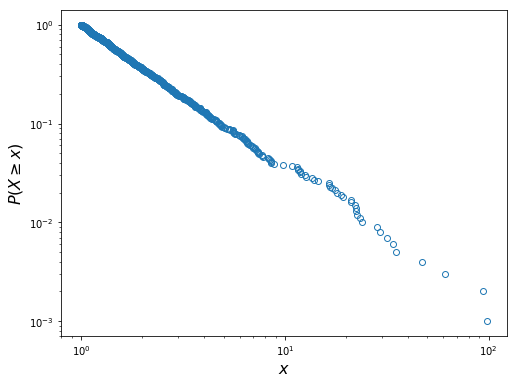

In [241]:
%store -r rs

from powerlaw import plot_ccdf
plot_ccdf(rvs)

### The implementation

In [222]:
"""Functions for generating and detecting power-laws.

References:

Clauset A, Shalizi CR, Newman MEJ (2009): Power-law distributions in
empirical data. SIAM Review 51(4): 661-703. DOI: 10.1173/070710111
"""

import matplotlib.pyplot as plt
import numpy as np

def random(size=1, xmin=1, alpha=1.5):
    """Draw random numbers from a power-law distribution using the inverse
    random sampling method.

    Input arguments:
    size  - Sample size
    xmin  - Minimum value for which the power-law holds
    alpha - Scaling exponent of the power-law distribution
    """
    rvs = np.random.random(size=size)
    return float(xmin) * (1.-rvs) ** (-1. / (float(alpha)-1.))

def plot_ccdf(rvs):
    """Plot complementary cumulative distribution function (CCDF) of
    a possibly power-law distributed sample.

    Input arguments:
    rvs   - Analyzed random sample
    """
    # Calculate complementary CDF
    n = np.size(rvs)
    xcdf, ycdf = np.sort(rvs), np.arange(n, 0, -1) / float(n)

    # Visualize the CDF
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    ax1.loglog(xcdf, ycdf, 'o', fillstyle='none')

def mle_alpha(rvs, xmin):
    """Maximum likelihood (ML) estimate of the scaling parameter
    alpha."""
    # Select observation larger than or equal to xmin
    rvs = rvs[rvs>=xmin]
    n = np.size(rvs)

    return 1. + n * (1. / np.sum(np.log(rvs / float(xmin))))

### References

Clauset A, Shalizi CR, Newman MEJ (2009): Power-law distributions in empirical data. *SIAM Review* 51(4):661–703. DOI: 10.1137/070710111